<a href="https://colab.research.google.com/github/yf591/Investment-Support/blob/main/Investment_Support_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリーのインストール＆インポート

In [ ]:
# Install required dependencies
!apt-get install -y build-essential
!apt-get install -y wget

# Download and install TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd ..

# Install the Python wrapper for TA-Lib
!pip install TA-Lib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-06-13 12:08:58--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-06-13 12:08:58--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Re

In [ ]:
!pip install yfinance
!pip install bayesian-optimization

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization

**【補足】**

**■TA-Lib**

TA-Lib（Technical Analysis Library）は、テクニカル分析を行うためのPython向けのライブラリです。

主な機能としては以下があります：

1. **テクニカル指標の計算**: TA-Libは、さまざまなテクニカル指標を計算するための関数を提供しています。例えば、移動平均線（Simple Moving Average, SMA）、指数加重移動平均（Exponential Moving Average, EMA）、相対力指数（Relative Strength Index, RSI）、ボリンジャーバンド（Bollinger Bands）などがあります。

2. **パターン認識**: チャートパターンの認識にも使用できます。例えば、ハンマーや逆ハンマー、三尊天井や三尊底などのパターンを認識するための機能があります。

3. **トレンドの特定**: 移動平均線やMACD（Moving Average Convergence Divergence）などを使用してトレンドの特定や転換点の検出が可能です。

4. **ボリュームの解析**: ボリューム指標を使用して、出来高や取引量の解析を行うことができます。

5. **統計的解析**: ヒストリカルデータを使用して統計的な解析を行う機能もあります。例えば、平均値、標準偏差、ボラティリティなどを計算できます。

※TA-Libは金融分野で広く利用されており、テクニカルアナリストやアルゴリズムトレーダーなどがチャート分析や取引戦略の開発に活用しています。

# get_stock_data関数

* 指定されたティッカーシンボルの株価データを取得します。外部APIやデータベースからデータを取得するための関数です。

In [ ]:
def get_stock_data(tickers, start, end):
    """Retrieve historical stock data for multiple tickers."""

    """
    指定されたティッカーシンボルの株価データを取得します。

    Parameters:
    - tickers (list): 株式のティッカーシンボルのリスト
    - start (str): データ取得の開始日（例: '2020-01-01'）
    - end (str): データ取得の終了日（例: '2023-01-01'）

    Returns:
    - dict: 各ティッカーシンボルに対応するデータフレームを含む辞書
    """

    # データ取得のロジックをここに記述
    stock_data = {ticker: yf.download(ticker, start=start, end=end) for ticker in tickers}
    return stock_data

# calculate_technical_indicators関数

*   株価データにテクニカル指標を計算して追加します。ここでは移動平均（MA）、相対力指数（RSI）、ボリンジャーバンドなどが含まれます。




In [ ]:
def calculate_technical_indicators(data):
    """Calculate technical indicators including MA, RSI, and Bollinger Bands."""

    """
    株価データにテクニカル指標（移動平均、RSI、ボリンジャーバンド）を追加します。

    Parameters:
    - data (DataFrame): 株価データ

    Returns:
    - DataFrame: テクニカル指標が追加された株価データ
    """

    # テクニカル指標の計算ロジックをここに記述
    data['Short_MA'] = data['Adj Close'].rolling(window=40, min_periods=1).mean()
    data['Long_MA'] = data['Adj Close'].rolling(window=100, min_periods=1).mean()
    data['RSI'] = talib.RSI(data['Adj Close'], timeperiod=14)
    data['Upper_Band'], data['Middle_Band'], data['Lower_Band'] = talib.BBANDS(data['Adj Close'], timeperiod=20)
    return data

# generate_signals関数

*   テクニカル指標に基づいて売買シグナルを生成します。例えば、短期移動平均が長期移動平均を上回ったら買いシグナル、下回ったら売りシグナルなどを設定します。



In [ ]:
def generate_signals(data):
    """Generate trading signals based on multiple strategies."""

    """
    テクニカル指標に基づいて売買シグナルを生成します。

    Parameters:
    - data (DataFrame): テクニカル指標が追加された株価データ

    Returns:
    - DataFrame: 売買シグナルが追加された株価データ
    """

    # テクニカル指標のシグナル生成ロジックをここに記述
    data['Signal'] = 0
    # Moving average crossover strategy
    data.loc[(data['Short_MA'] > data['Long_MA']) & (data['RSI'] < 70), 'Signal'] = 1  # Buy signal
    data.loc[(data['Short_MA'] < data['Long_MA']) & (data['RSI'] > 30), 'Signal'] = -1  # Sell signal
    # RSI strategy
    data.loc[data['RSI'] > 70, 'Signal'] = -1  # Sell signal
    data.loc[data['RSI'] < 30, 'Signal'] = 1  # Buy signal
    # Bollinger Bands strategy
    data.loc[(data['Adj Close'] > data['Upper_Band']), 'Signal'] = -1  # Sell signal
    data.loc[(data['Adj Close'] < data['Lower_Band']), 'Signal'] = 1  # Buy signal
    return data

# calculate_position_size関数

*   各トレードのリスクに基づいてポジションサイズを計算します。トレードごとのリスク割合や初期資本を考慮して、適切なトレードサイズを計算します。



In [ ]:
def calculate_position_size(data, risk_per_trade=0.01, initial_capital=100000):
    """Calculate position size based on risk management."""

    """
    リスク管理に基づいてポジションサイズを計算します。

    Parameters:
    - data (DataFrame): 売買シグナルが追加された株価データ
    - risk_per_trade (float): トレードごとのリスク割合（初期資本に対する割合）
    - initial_capital (float): 初期資本

    Returns:
    - DataFrame: ポジションサイズが追加された株価データ
    """

    # ポジションサイズの計算ロジックをここに記述
    data['Prev_Close'] = data['Adj Close'].shift(1)
    data['TR'] = data.apply(lambda x: max(x['High'] - x['Low'], abs(x['High'] - x['Prev_Close']), abs(x['Low'] - x['Prev_Close'])), axis=1)
    data['ATR'] = data['TR'].rolling(window=14).mean()
    data['Position_Size'] = (risk_per_trade * initial_capital) / data['ATR']
    return data

# backtest_strategy関数


*   売買シグナルに基づいてバックテストを実施します。初期資本、取引コスト、スリッページなどを考慮して、戦略のパフォーマンスを評価します。



In [ ]:
def backtest_strategy(data, initial_capital=100000, transaction_cost=0.001, slippage=0.001):
    """Backtest the strategy with risk management, transaction costs, and slippage."""

    """
    売買シグナルに基づいてバックテストを行います。

    Parameters:
    - data (DataFrame): 売買シグナルが追加された株価データ
    - initial_capital (float): 初期資本
    - transaction_cost (float): 取引コスト（例: 0.001）
    - slippage (float): スリッページ（例: 0.001）

    Returns:
    - DataFrame: バックテストの結果
    """

    # バックテストのロジックをここに記述
    data['Return'] = data['Adj Close'].pct_change()
    data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']
    # Subtract transaction costs and slippage
    data['Transaction_Cost'] = data['Signal'].diff().abs() * transaction_cost
    data['Slippage_Cost'] = data['Signal'].diff().abs() * slippage
    data['Strategy_Return'] = data['Strategy_Return'] - data['Transaction_Cost'] - data['Slippage_Cost']
    # Calculate portfolio value
    data['Portfolio'] = initial_capital * (1 + data['Strategy_Return']).cumprod()
    # Calculate drawdown
    data['Cumulative_Max'] = data['Portfolio'].cummax()
    data['Drawdown'] = data['Portfolio'] - data['Cumulative_Max']
    max_drawdown = data['Drawdown'].min()
    # Annualize Sharpe ratio
    annual_sharpe_ratio = (data['Strategy_Return'].mean() / data['Strategy_Return'].std()) * np.sqrt(252)
    return data, annual_sharpe_ratio, max_drawdown

# optimize_parameters関数

*   パラメータの最適化を行います。異なるテクニカル指標のパラメータを試して、最適な組み合わせを見つけ、シャープレシオを最大化するように最適化します。



In [ ]:
def optimize_parameters(data, initial_capital=100000, transaction_cost=0.001, slippage=0.001):
    """Optimize strategy parameters using Bayesian Optimization."""

    """
    パラメータの最適化を行います。

    Parameters:
    - data (DataFrame): 株価データ
    - initial_capital (float): 初期資本
    - transaction_cost (float): 取引コスト（例: 0.001）
    - slippage (float): スリッページ（例: 0.001）

    Returns:
    - dict: 最適化されたパラメータ
    - float: 最適化されたシャープレシオ
    """

    # パラメータ最適化のロジックをここに記述
    def target_function(short_window, long_window, rsi_period, bb_period):
        data_copy = data.copy()
        data_copy['Short_MA'] = data_copy['Adj Close'].rolling(window=int(short_window), min_periods=1).mean()
        data_copy['Long_MA'] = data_copy['Adj Close'].rolling(window=int(long_window), min_periods=1).mean()
        data_copy['RSI'] = talib.RSI(data_copy['Adj Close'], timeperiod=int(rsi_period))
        data_copy['Upper_Band'], data_copy['Middle_Band'], data_copy['Lower_Band'] = talib.BBANDS(data_copy['Adj Close'], timeperiod=int(bb_period))
        strategy_data = generate_signals(data_copy)
        strategy_data = calculate_position_size(strategy_data)
        backtest_results, annual_sharpe_ratio, _ = backtest_strategy(strategy_data, initial_capital, transaction_cost, slippage)
        return annual_sharpe_ratio

    optimizer = BayesianOptimization(
        f=target_function,
        pbounds={
            'short_window': (5, 50),
            'long_window': (50, 200),
            'rsi_period': (5, 50),
            'bb_period': (10, 50)
        },
        random_state=1
    )
    optimizer.maximize(init_points=10, n_iter=30)
    best_params = optimizer.max['params']
    best_params = {k: int(v) for k, v in best_params.items()}
    best_sharpe = optimizer.max['target']
    return best_params, best_sharpe

# backtest_with_optimized_params関数

*   最適化されたパラメータを使用してバックテストを実施します。これにより、最適化された戦略のパフォーマンスを評価します。

In [ ]:
def backtest_with_optimized_params(data, optimized_params, initial_capital=100000, transaction_cost=0.001, slippage=0.001):
    """Backtest the strategy with optimized parameters."""

    """
    最適化されたパラメータを使用してバックテストを行います。

    Parameters:
    - data (DataFrame): 株価データ
    - optimized_params (dict): 最適化されたパラメータ
    - initial_capital (float): 初期資本
    - transaction_cost (float): 取引コスト（例: 0.001）
    - slippage (float): スリッページ（例: 0.001）

    Returns:
    - DataFrame: バックテストの結果
    - float: 年率換算シャープレシオ
    - float: 最大ドローダウン
    """

    # 最適化パラメータを使用したバックテストのロジックをここに記述
    data_copy = data.copy()
    data_copy['Short_MA'] = data_copy['Adj Close'].rolling(window=optimized_params['short_window'], min_periods=1).mean()
    data_copy['Long_MA'] = data_copy['Adj Close'].rolling(window=optimized_params['long_window'], min_periods=1).mean()
    data_copy['RSI'] = talib.RSI(data_copy['Adj Close'], timeperiod=optimized_params['rsi_period'])
    data_copy['Upper_Band'], data_copy['Middle_Band'], data_copy['Lower_Band'] = talib.BBANDS(data_copy['Adj Close'], timeperiod=optimized_params['bb_period'])
    strategy_data = generate_signals(data_copy)
    strategy_data = calculate_position_size(strategy_data)
    backtest_results, annual_sharpe_ratio, max_drawdown = backtest_strategy(strategy_data, initial_capital, transaction_cost, slippage)
    return backtest_results, annual_sharpe_ratio, max_drawdown

# plot_backtest_results関数

*   バックテスト結果を視覚的に表示します。ポートフォリオの価値やドローダウンの推移をプロットします。



In [ ]:
def plot_backtest_results(data):
    """Plot portfolio value and drawdown."""

    """
    バックテスト結果をプロットします。

    Parameters:
    - data (DataFrame): バックテスト結果

    Returns:
    - None
    """

    # プロットのロジックをここに記述
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))
    # Plot portfolio value
    ax[0].plot(data['Portfolio'], label='Portfolio Value')
    ax[0].set_title('Portfolio Value Over Time')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Portfolio Value')
    ax[0].legend()
    # Plot drawdown
    ax[1].plot(data['Drawdown'], label='Drawdown', color='red')
    ax[1].set_title('Drawdown Over Time')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Drawdown')
    ax[1].legend()
    plt.tight_layout()
    plt.show()

※上記の各関数を組み合わせて株価データの取得から戦略の最適化と評価までの一連のプロセスを実行できます。

※各関数はモジュール化されており、個別にテストや改良を行うことが容易です。

# 使用例

In [ ]:
# Example usage
tickers = ['7203.T', '6758.T', '9984.T']
start_date = '2015-01-01'
end_date = '2023-01-01'

# データの取得
"""
指定されたティッカーシンボルの株価データを取得します。tickersには株式のシンボル（例：'6758.T'など）がリストで含まれています。
日本株の例としてトヨタ（7203.T）、ソニー（6758.T）、ソフトバンク（9984.T）のティッカーシンボルを使用しています。
"""
stock_data = get_stock_data(tickers, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# 出力

|   iter    |  target   | bb_period | long_w... | rsi_pe... | short_... |
-------------------------------------------------------------------------
| 1         | -0.5718   | 26.68     | 158.0     | 5.005     | 18.6      |
| 2         | -0.4707   | 15.87     | 63.85     | 13.38     | 20.55     |
| 3         | -0.1632   | 25.87     | 130.8     | 23.86     | 35.83     |
| 4         | -0.3628   | 18.18     | 181.7     | 6.232     | 35.17     |
| 5         | -0.406    | 26.69     | 133.8     | 11.32     | 13.91     |
| 6         | -0.2505   | 42.03     | 195.2     | 19.1      | 36.15     |
| 7         | -0.6257   | 45.06     | 184.2     | 8.827     | 6.757     |
| 8         | -0.452    | 16.79     | 181.7     | 9.426     | 23.95     |
| 9         | -0.3152   | 48.32     | 130.0     | 36.13     | 19.2      |
| 10        | -0.4717   | 37.46     | 175.2     | 5.823     | 38.76     |
| 11        | -0.3299   | 47.59     | 130.0     | 37.06     | 21.04     |
| 12        | -0.132    | 19.98     | 

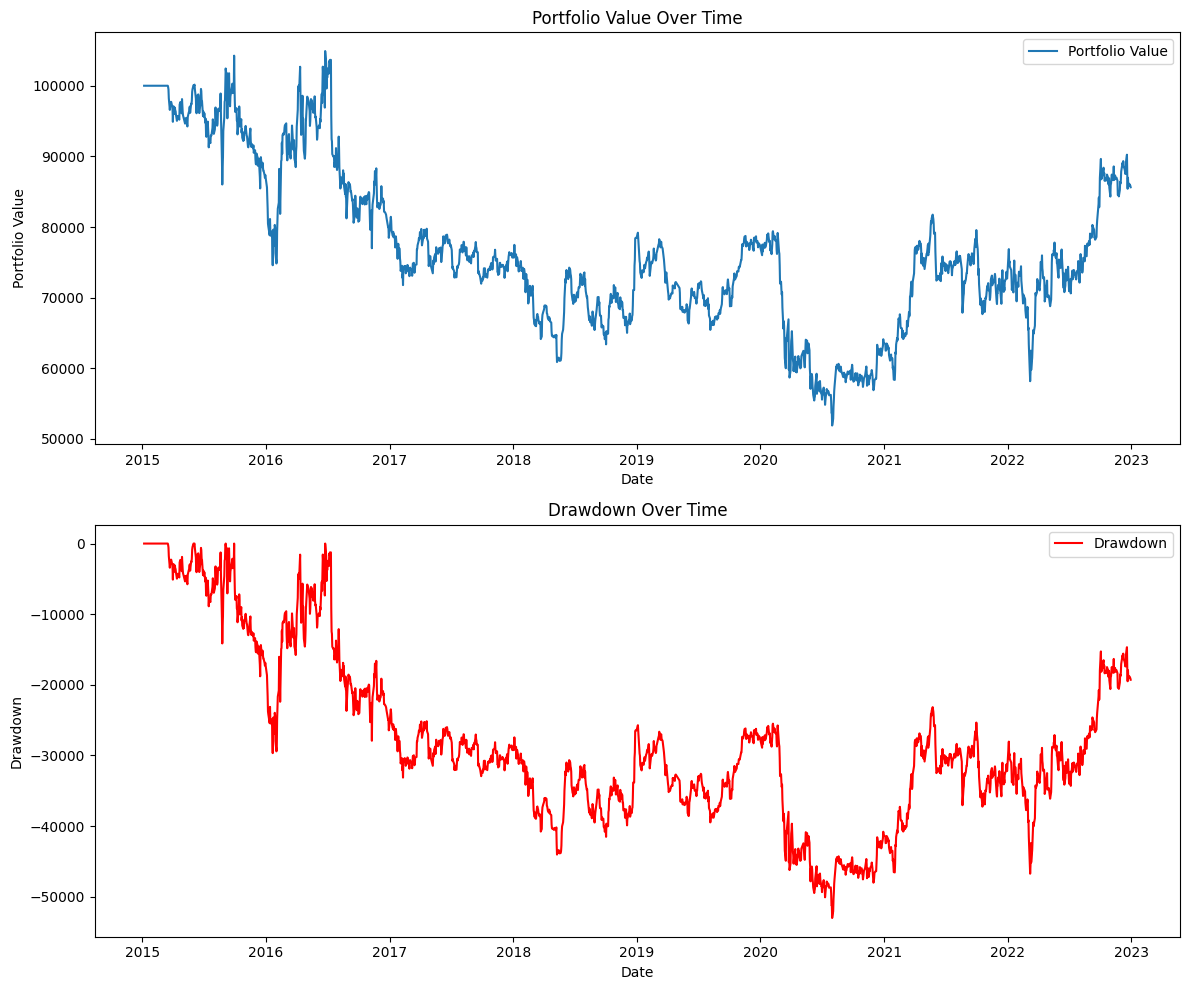

|   iter    |  target   | bb_period | long_w... | rsi_pe... | short_... |
-------------------------------------------------------------------------
| 1         | -0.2876   | 26.68     | 158.0     | 5.005     | 18.6      |
| 2         | 0.1242    | 15.87     | 63.85     | 13.38     | 20.55     |
| 3         | 0.2845    | 25.87     | 130.8     | 23.86     | 35.83     |
| 4         | 0.03919   | 18.18     | 181.7     | 6.232     | 35.17     |
| 5         | 0.0752    | 26.69     | 133.8     | 11.32     | 13.91     |
| 6         | 0.5318    | 42.03     | 195.2     | 19.1      | 36.15     |
| 7         | 0.06461   | 45.06     | 184.2     | 8.827     | 6.757     |
| 8         | 0.04178   | 16.79     | 181.7     | 9.426     | 23.95     |
| 9         | 0.0951    | 48.32     | 130.0     | 36.13     | 19.2      |
| 10        | -0.086    | 37.46     | 175.2     | 5.823     | 38.76     |
| 11        | 0.5359    | 45.55     | 194.5     | 19.77     | 36.2      |
| 12        | 0.4898    | 42.72     | 

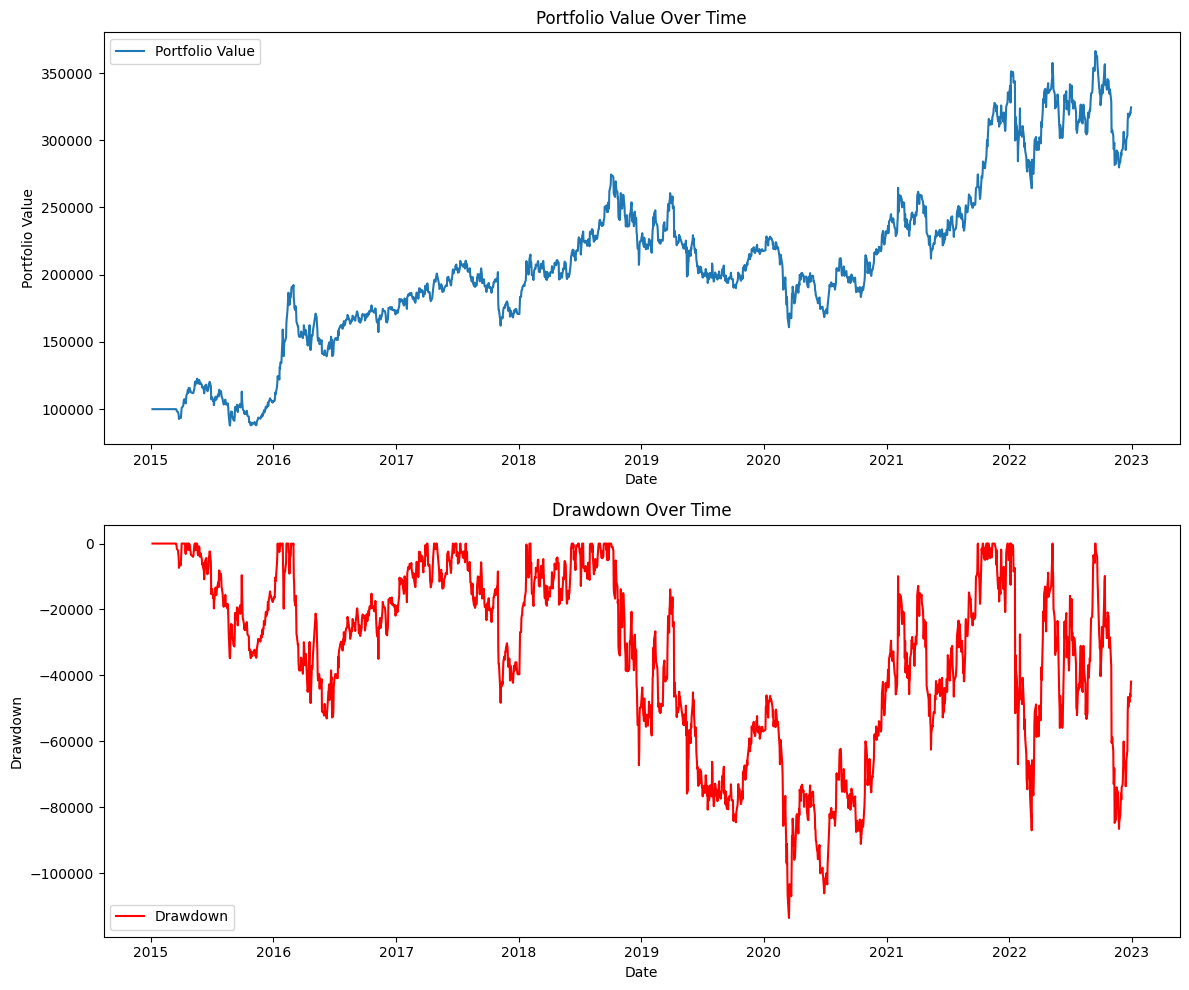

|   iter    |  target   | bb_period | long_w... | rsi_pe... | short_... |
-------------------------------------------------------------------------
| 1         | -0.7953   | 26.68     | 158.0     | 5.005     | 18.6      |
| 2         | -0.7178   | 15.87     | 63.85     | 13.38     | 20.55     |
| 3         | 0.2311    | 25.87     | 130.8     | 23.86     | 35.83     |
| 4         | -0.4842   | 18.18     | 181.7     | 6.232     | 35.17     |
| 5         | -0.4311   | 26.69     | 133.8     | 11.32     | 13.91     |
| 6         | -0.0878   | 42.03     | 195.2     | 19.1      | 36.15     |
| 7         | -0.5633   | 45.06     | 184.2     | 8.827     | 6.757     |
| 8         | -0.3847   | 16.79     | 181.7     | 9.426     | 23.95     |
| 9         | -0.2962   | 48.32     | 130.0     | 36.13     | 19.2      |
| 10        | -0.6723   | 37.46     | 175.2     | 5.823     | 38.76     |
| 11        | -0.4322   | 16.9      | 182.5     | 9.531     | 22.67     |
| 12        | -0.136    | 31.12     | 

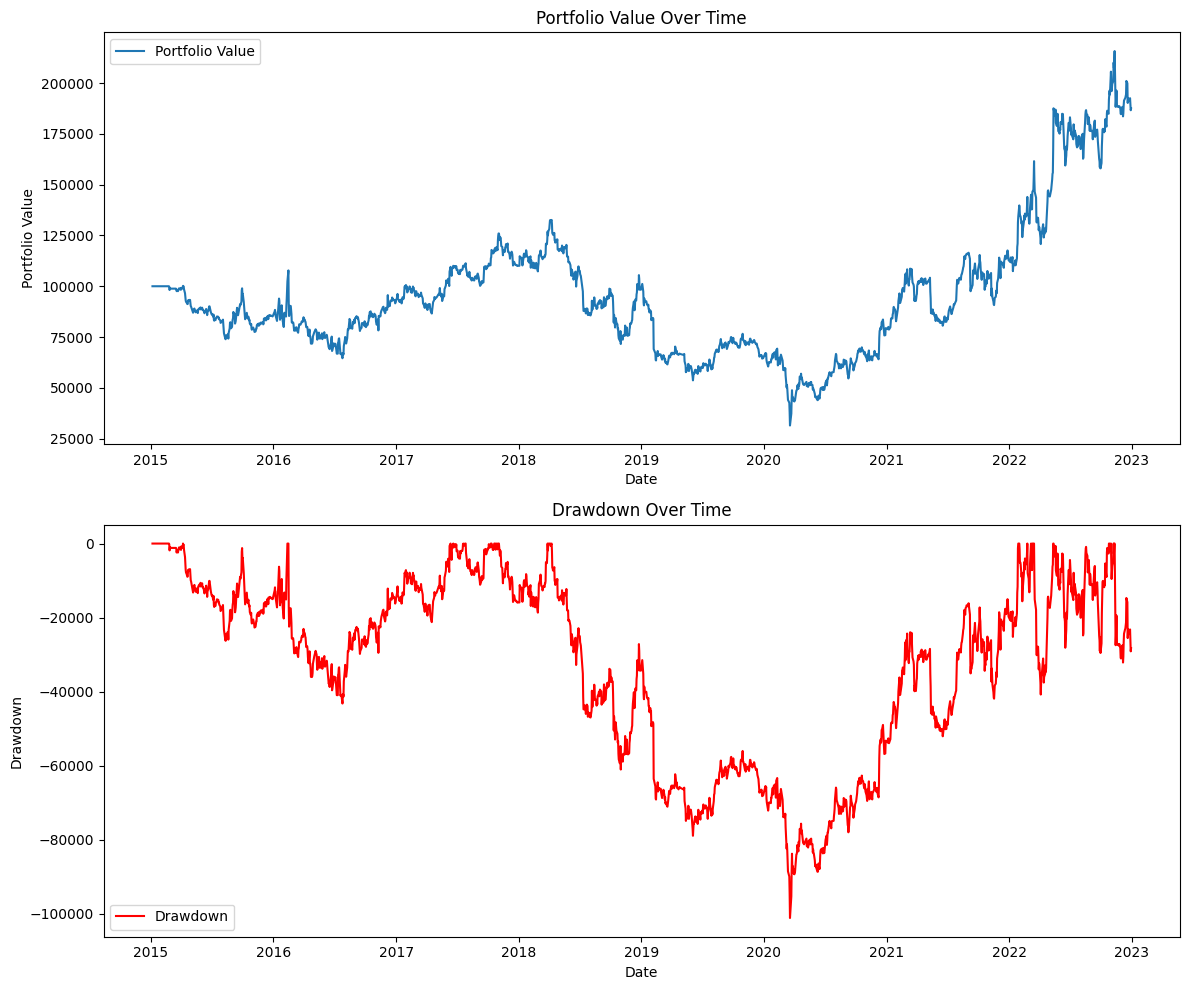

In [ ]:
for ticker, data in stock_data.items():
    # Calculate technical indicators（テクニカル指標の計算）
    # 各ティッカーの株価データに対して、移動平均（MA）、相対力指数（RSI）、ボリンジャーバンドを計算します。
    stock_data[ticker] = calculate_technical_indicators(data)
    # Optimize parameters（パラメータの最適化）
    """
    ベイズ最適化を使用して、各ティッカーの最適なパラメータ（短期移動平均期間、長期移動平均期間、RSI期間、ボリンジャーバンド期間）を見つけます。
    最適なパラメータと最適化されたシャープレシオを出力します。
    """
    optimized_params, best_sharpe = optimize_parameters(stock_data[ticker])
    print(f"Best parameters for {ticker}: {optimized_params}")
    print(f"Best Sharpe ratio for {ticker}: {best_sharpe:.4f}")

    # Backtest with optimized parameters(最適化されたパラメータでバックテスト)
    """
    最適化されたパラメータを使用してバックテストを行います。
    最終ポートフォリオの価値、年率換算のシャープレシオ、最大ドローダウン（損失の最大値）を出力します。
    """
    backtest_results, annual_sharpe_ratio, max_drawdown = backtest_with_optimized_params(stock_data[ticker], optimized_params)
    final_portfolio_value = backtest_results['Portfolio'].iloc[-1]
    print(f"Final Portfolio Value for {ticker} with Optimized Parameters: ${final_portfolio_value:.2f}")
    print(f"Annualized Sharpe Ratio for {ticker}: {annual_sharpe_ratio:.4f}")
    print(f"Maximum Drawdown for {ticker}: ${max_drawdown:.2f}")

    # Plotting the results（結果のプロット）：ポートフォリオの価値とドローダウンのグラフを表示します。
    plot_backtest_results(backtest_results)

# 出力内容の解説
1.最適パラメータの出力

　・各ティッカーについて、ベイズ最適化により見つけた最適なパラメータが表示されます。

　・例: Best parameters for 6758.T: {'bb_period': 50, 'long_window': 176, 'rsi_period': 50, 'short_window': 50}

2.最適化されたシャープレシオの出力

　・最適化されたパラメータで計算されたシャープレシオが表示されます。

　・例: Best Sharpe ratio for 6758.T: 0.6398

3.最終ポートフォリオ価値の出力

　・バックテストの終了時点でのポートフォリオの価値が表示されます。

　・例: Final Portfolio Value for 6758.T with Optimized Parameters: $324464.38

4.年率換算シャープレシオの出力

　・最適化されたパラメータで計算された年率換算のシャープレシオが表示されます。

　・例: Annualized Sharpe Ratio for 6758.T: 0.6398

5.最大ドローダウンの出力

　・バックテスト期間中の最大ドローダウン（損失の最大値）が表示されます。

　・例: Maximum Drawdown for 6758.T: $-113576.30

# グラフの読み方
1.Portfolio Value Over Time

　・横軸（X軸）：時間（日付）

　・縦軸（Y軸）：ポートフォリオの価値

・このグラフはバックテスト期間中のポートフォリオの価値の推移を示しています。
ポートフォリオがどのように成長または減少したかを視覚的に確認できます。

2.Drawdown Over Time

　・横軸（X軸）：時間（日付）

　・縦軸（Y軸）：ドローダウンの値

　・このグラフはバックテスト期間中のドローダウン（損失）の推移を示しています。
ドローダウンが大きくなる時期や、最大の損失が発生した時期を視覚的に確認できます。